Set-up

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
%matplotlib inline
plt.rcParams["figure.figsize"] = (5, 3) # (w, h)
plt.rcParams["figure.dpi"] = 200
from sklearn.model_selection import train_test_split


from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [2]:
#set path
default_path = r'C:\Users\sfofa\OneDrive\Documents\Stanford Classes\Grad\CS_129'
os.chdir(default_path)
%cd C:\Users\sfofa\OneDrive\Documents\Stanford Classes\Grad\CS_129
%pwd

C:\Users\sfofa


'C:\\Users\\sfofa\\OneDrive\\Documents\\Stanford Classes\\Grad\\CS_129'

In [105]:
#reading in data
df = pd.read_csv(r'C:\Users\sfofa\OneDrive\Documents\Stanford Classes\Grad\CS_129\sc_data.csv')
df

,Case,by_speaker,in_maj,total_talk_times,issue,issueArea,Term,polarity,subjectivity,majOpinWriter
0,03-1238,j__anthony_m_kennedy,1,37.258,70040,7,3,0.000000,0.000000,103
1,03-1238,j__antonin_scalia,1,344.528,70040,7,3,0.007035,0.450974,103
2,03-1238,j__david_h_souter,1,82.596,70040,7,3,-0.255833,0.387500,103
3,03-1238,j__john_g_roberts_jr,1,160.504,70040,7,3,-0.033139,0.438463,103
4,03-1238,j__ruth_bader_ginsburg,1,286.634,70040,7,3,0.268750,0.514583,103
...,...,...,...,...,...,...,...,...,...,...
6095,19-715,j__neil_gorsuch,1,524.720,130015,13,19,0.167956,0.422740,111
6096,19-715,j__ruth_bader_ginsburg,1,211.600,130015,13,19,0.017083,0.415417,111
6097,19-715,j__samuel_a_alito_jr,0,309.680,130015,13,19,0.037500,0.510189,111
6098,19-715,j__sonia_sotomayor,1,379.360,130015,13,19,-0.018056,0.259722,111


In [106]:
#creating tenure term
#creating term like year
df['tm'] = df['Term']+2000

#creating start times for each judge 
df['start_ten'] = 0

df.loc[df['by_speaker'] == 'j__antonin_scalia','start_ten']= 1986
df.loc[df['by_speaker'] == 'j__brett_m_kavanaugh','start_ten']= 2018
df.loc[df['by_speaker'] == 'j__clarence_thomas','start_ten']= 1991
df.loc[df['by_speaker'] == 'j__david_h_souter','start_ten']= 1990
df.loc[df['by_speaker'] == 'j__elena_kagan','start_ten']= 2010
df.loc[df['by_speaker'] == 'j__john_g_roberts_jr','start_ten']= 2005
df.loc[df['by_speaker'] == 'j__john_paul_stevens','start_ten']= 1975
df.loc[df['by_speaker'] == 'j__neil_gorsuch','start_ten']= 2017
df.loc[df['by_speaker'] == 'j__ruth_bader_ginsburg','start_ten']= 1993
df.loc[df['by_speaker'] == 'j__samuel_a_alito_jr','start_ten']= 2006
df.loc[df['by_speaker'] == 'j__sandra_day_oconnor','start_ten']= 1981
df.loc[df['by_speaker'] == 'j__sonia_sotomayor','start_ten']= 2009
df.loc[df['by_speaker'] == 'j__stephen_g_breyer','start_ten']= 1994
df.loc[df['by_speaker'] == 'j__anthony_m_kennedy','start_ten']= 1988
df

#create a tenure age for each judge for each case (tm (term) - start_tenure)
df['tenure'] = df['tm'] -df['start_ten']

In [71]:
df

,Case,by_speaker,in_maj,total_talk_times,issue,issueArea,Term,polarity,subjectivity,majOpinWriter,tm,start_ten,tenure
0,03-1238,j__anthony_m_kennedy,1,37.258,70040,7,3,0.000000,0.000000,103,2003,1988,15
1,03-1238,j__antonin_scalia,1,344.528,70040,7,3,0.007035,0.450974,103,2003,1986,17
2,03-1238,j__david_h_souter,1,82.596,70040,7,3,-0.255833,0.387500,103,2003,1990,13
3,03-1238,j__john_g_roberts_jr,1,160.504,70040,7,3,-0.033139,0.438463,103,2003,2005,-2
4,03-1238,j__ruth_bader_ginsburg,1,286.634,70040,7,3,0.268750,0.514583,103,2003,1993,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,19-715,j__neil_gorsuch,1,524.720,130015,13,19,0.167956,0.422740,111,2019,2017,2
6096,19-715,j__ruth_bader_ginsburg,1,211.600,130015,13,19,0.017083,0.415417,111,2019,1993,26
6097,19-715,j__samuel_a_alito_jr,0,309.680,130015,13,19,0.037500,0.510189,111,2019,2006,13
6098,19-715,j__sonia_sotomayor,1,379.360,130015,13,19,-0.018056,0.259722,111,2019,2009,10


In [107]:
#creating dummy varibales of categorical features
speaker  = pd.get_dummies(df['by_speaker'], drop_first = True) 
#may not use issue area as there are a lot of unique issue codes
issue_1  = pd.get_dummies(df['issue'], drop_first = True) 
issue_Area  = pd.get_dummies(df['issueArea'], drop_first = True) 

#drop features not needed in the dataset
df = df.drop(['Case', 'by_speaker', 'issue', 'issueArea', 'tm'], axis =1)

# add in dummy values to the dataset
concat = pd.concat([speaker,issue_Area], axis =1)
df = pd.concat([df, concat], axis =1)

df

,in_maj,total_talk_times,Term,polarity,subjectivity,majOpinWriter,start_ten,tenure,j__antonin_scalia,j__brett_m_kavanaugh,...,4,5,6,7,8,9,10,12,13,14
0,1,37.258,3,0.000000,0.000000,103,1988,15,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,344.528,3,0.007035,0.450974,103,1986,17,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,82.596,3,-0.255833,0.387500,103,1990,13,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,160.504,3,-0.033139,0.438463,103,2005,-2,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,286.634,3,0.268750,0.514583,103,1993,10,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,1,524.720,19,0.167956,0.422740,111,2017,2,0,0,...,0,0,0,0,0,0,0,0,1,0
6096,1,211.600,19,0.017083,0.415417,111,1993,26,0,0,...,0,0,0,0,0,0,0,0,1,0
6097,0,309.680,19,0.037500,0.510189,111,2006,13,0,0,...,0,0,0,0,0,0,0,0,1,0
6098,1,379.360,19,-0.018056,0.259722,111,2009,10,0,0,...,0,0,0,0,0,0,0,0,1,0


In [108]:
y = df.majOpinWriter.values
y
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df
X= normalized_df.loc[:,df.columns != 'majOpinWriter'].values
X

array([[1.        , 0.00423527, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.03916388, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.00938902, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.03520257, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.04312337, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.03790346, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [109]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)

for train_index, test_index in sss.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
#default reg of 10 - smaller values specify stronger regularization
# default regualrization equals l2 - ridge regression shrinks vallues of theta- estimates 
clf = LogisticRegressionCV(cv=5, max_iter = 4000) # changed value of max_iter from default as I was getting errors
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print(acc)       


0.18032786885245902


In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import itertools

from sklearn.metrics import precision_recall_fscore_support
ypredict=clf.predict(X)
print(metrics.classification_report(y_test, clf.predict(X_test)))


              precision    recall  f1-score   support

         103       0.14      0.06      0.09        16
         104       0.25      0.50      0.33         2
         105       0.17      0.16      0.16        51
         106       0.22      0.14      0.17        56
         107       0.12      0.28      0.17        18
         108       0.11      0.16      0.13        69
         109       0.23      0.34      0.28        65
         110       0.10      0.09      0.09        66
         111       0.34      0.30      0.32        81
         112       0.19      0.12      0.15        73
         113       0.16      0.15      0.16        47
         114       0.09      0.07      0.08        43
         115       0.22      0.15      0.18        13
         116       0.25      0.30      0.27        10

    accuracy                           0.18       610
   macro avg       0.18      0.20      0.18       610
weighted avg       0.18      0.18      0.18       610



In [111]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, Y_predict, labels= [103,104,105,106,107,108,109,110,
                                                        111,112,113,114,115,116])
#0,0 false negatives
# 1,0 false negatives
# 1,1 true positives
# 0,1 false positives

array([[[591,   3],
        [ 15,   1]],

       [[607,   1],
        [  1,   1]],

       [[517,  42],
        [ 42,   9]],

       [[524,  30],
        [ 49,   7]],

       [[560,  32],
        [ 13,   5]],

       [[449,  92],
        [ 57,  12]],

       [[469,  76],
        [ 43,  22]],

       [[490,  54],
        [ 60,   6]],

       [[480,  49],
        [ 61,  20]],

       [[492,  45],
        [ 65,   8]],

       [[525,  38],
        [ 40,   7]],

       [[534,  33],
        [ 39,   4]],

       [[594,   3],
        [ 11,   2]],

       [[595,   5],
        [  7,   3]]], dtype=int64)

In [112]:
# learning curves
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegressionCV

In [124]:
#choose where to evaluate error
train_sizes = [1, 100, 500, 2000, 3000, 4480]

features = ['in_maj','total_talk_times','Term', 'polarity', 'subjectivity', 'j__antonin_scalia',
           'j__brett_m_kavanaugh', 'j__clarence_thomas', 'j__david_h_souter','j__elena_kagan','j__john_g_roberts_jr',
            'j__john_paul_stevens','j__john_paul_stevens','j__neil_gorsuch', 'j__ruth_bader_ginsburg',
            'j__samuel_a_alito_jr', 'j__sandra_day_oconnor', 'j__sonia_sotomayor', 'j__stephen_g_breyer', 
            'tenure', 'start_ten']

df_lc= normalized_df.loc[:]


target = 'majOpinWriter'
train_sizes, train_scores, validation_scores = learning_curve(
                                                   LogisticRegression(max_iter = 5000), X = df[features],
                                                   y = df[target], train_sizes = train_sizes,
                                                   scoring = 'neg_log_loss', shuffle =True)

C:\Users\sfofa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sfofa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sfofa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1372, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 111

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\sfofa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteration

ValueError: y_true and y_pred contain different number of classes 14, 12. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [103 104 105 106 107 108 109 110 111 112 113 114 115 116]

,in_maj,total_talk_times,Term,polarity,subjectivity,majOpinWriter,start_ten,tenure,j__antonin_scalia,j__brett_m_kavanaugh,...,4,5,6,7,8,9,10,12,13,14
0,1,37.258,3,0.000000,0.000000,103,1988,15,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,344.528,3,0.007035,0.450974,103,1986,17,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,82.596,3,-0.255833,0.387500,103,1990,13,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,160.504,3,-0.033139,0.438463,103,2005,-2,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,286.634,3,0.268750,0.514583,103,1993,10,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,1,524.720,19,0.167956,0.422740,111,2017,2,0,0,...,0,0,0,0,0,0,0,0,1,0
6096,1,211.600,19,0.017083,0.415417,111,1993,26,0,0,...,0,0,0,0,0,0,0,0,1,0
6097,0,309.680,19,0.037500,0.510189,111,2006,13,0,0,...,0,0,0,0,0,0,0,0,1,0
6098,1,379.360,19,-0.018056,0.259722,111,2009,10,0,0,...,0,0,0,0,0,0,0,0,1,0


In [125]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[        nan         nan         nan         nan         nan]
 [-0.06212575 -0.03100876 -0.10920429 -0.15637522  0.40966968]
 [-0.19541702 -0.27496531 -0.30993198 -0.23663672 -0.02577551]
 [-0.17391141 -0.36752416 -0.25042181 -0.20140428 -0.16192584]
 [-0.19516922 -0.27522007 -0.23464022 -0.16713136 -0.22407377]
 [-0.20420212 -0.2471062  -0.2435843  -0.26950173 -0.21369731]]

 ----------------------------------------------------------------------

Validation scores:

 [[        nan         nan         nan         nan         nan]
 [ 0.1717179  -0.16589069 -0.05797036 -0.06814109  0.40008834]
 [-0.08973189 -0.18796304 -0.25214742  0.01128863  0.33355334]
 [ 0.08767216 -0.16016772 -0.0666316   0.15918884  0.37641077]
 [ 0.03767565  0.08323111 -0.01746137  0.17237575  0.3708842 ]
 [-0.06081944  0.1222294   0.09663291  0.20022569  0.3978472 ]]


In [126]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1            NaN
100    -0.010191
500     0.208545
2000    0.231038
3000    0.219247
4480    0.235618
dtype: float64

 --------------------

Mean validation scores

 1            NaN
100    -0.055961
500     0.037000
2000   -0.079294
3000   -0.129341
4480   -0.151223
dtype: float64


(0.0, 2.0)

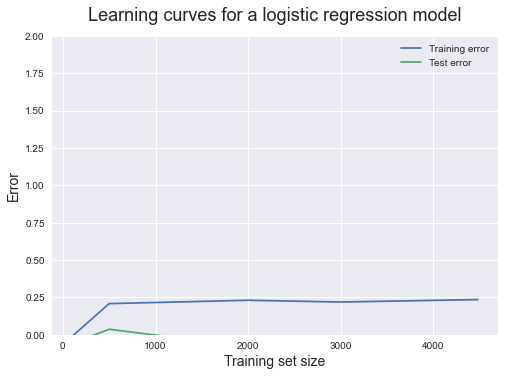

In [128]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Test error')
plt.ylabel('Error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a logistic regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,2)

# generally the narrower the gap the lower the varinace, this graph indicates that there may be high variance
#gap = validation error - training error